<div style="font-family: 'Trebuchet MS', sans-serif; font-size: 36px; text-align: center; color: #FDD800; background-color: #1E1E2F; padding: 30px; border: 3px solid #FFD700; border-radius: 15px; box-shadow: 0 6px 15px rgba(0, 0, 0, 0.4); margin-bottom: 25px; line-height: 1.8;">
    <strong>SYED HAIDER SHAH</strong> <br>
    <strong>ROLL NO 2</strong> <br>
    <strong>BS AI 7th</strong> <br>
    <strong>ANN</strong>
</div>


<div style="font-family: 'Trebuchet MS', sans-serif; font-size: 36px; text-align: center; color: #FDD800; background-color: #1E1E2F; padding: 30px; border: 3px solid #FFD700; border-radius: 15px; box-shadow: 0 6px 15px rgba(0, 0, 0, 0.4); margin-bottom: 25px; line-height: 1.8;">
    <strong>SUBMITTED TO</strong> <br>
    <strong>DR. ADIL ASLAM</strong>
</div>

<div style="font-family: 'Trebuchet MS', sans-serif; font-size: 36px; text-align: center; color: #FFD700; background-color: #1E1E2F; padding: 30px; border: 3px solid #FFD700; border-radius: 15px; box-shadow: 0 6px 15px rgba(0, 0, 0, 0.4); margin-bottom: 25px;">
    <strong>Fashion MNIST Classification</strong>
</div>

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5907 - accuracy: 0.7827 - val_loss: 0.4255 - val_accuracy: 0.8478
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4420 - accuracy: 0.8401 - val_loss: 0.3996 - val_accuracy: 0.8608
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4063 - accuracy: 0.8508 - val_loss: 0.3919 - val_accuracy: 0.8535
Epoch 4/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3833 - accuracy: 0.8615 - val_loss: 0.3755 - val_accuracy: 0.8674
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3702 - accuracy: 0.8643 - val_loss: 0.3947 - val_accuracy: 0.8575
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3570 - accuracy: 0.8701 - val_loss: 0.3678 - val_accuracy: 0.8672
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3458 - accuracy: 0.8746 - val_loss: 0.3555 - val_accurac

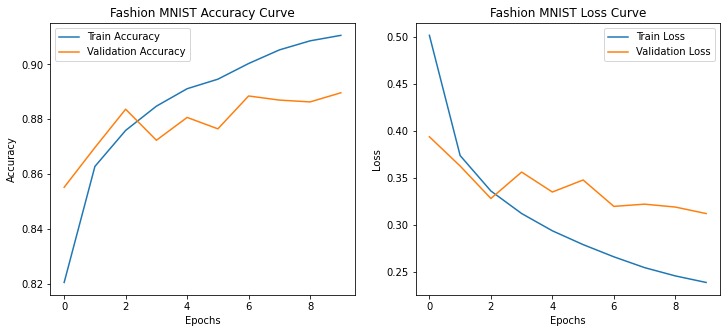

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import fashion_mnist

# Load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values (0-255 → 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define ANN model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Convert 2D (28x28) to 1D (784)
    Dense(256, activation='relu'),  # First hidden layer (256 neurons)
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(128, activation='relu'),  # Second hidden layer (128 neurons)
    Dropout(0.3),  
    Dense(64, activation='relu'),   # Third hidden layer (64 neurons)
    Dense(10, activation='softmax') # Output layer (10 classes)
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

# Evaluate test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plot accuracy and loss for Fashion MNIST
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_fashion.history['accuracy'], label='Train Accuracy')
plt.plot(history_fashion.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Fashion MNIST Accuracy Curve')

plt.subplot(1, 2, 2)
plt.plot(history_fashion.history['loss'], label='Train Loss')
plt.plot(history_fashion.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Fashion MNIST Loss Curve')

plt.show()



1/1 [==============================] - 0s 122ms/step


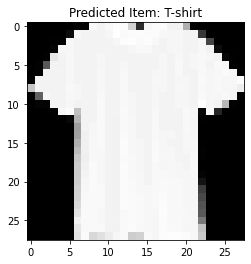

In [7]:
# Load a new clothing image
image = cv2.imread('t shirt.png', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (28, 28))  # Resize to 28x28
image = 255 - image  # Invert colors if needed
image = image / 255.0  # Normalize
image = image.reshape(1, 28, 28)  # Reshape to match model input

# Predict
prediction = model.predict(image)
predicted_class = np.argmax(prediction)

# Class Labels
class_labels = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

# Display result
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title(f'Predicted Item: {class_labels[predicted_class]}')
plt.show()
